Put MC: 4.778942150333171
SE: 0.026888080390905764


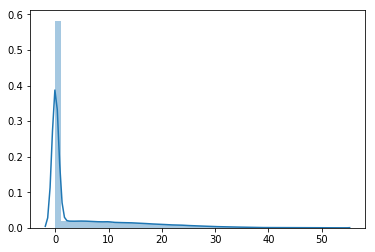

In [9]:
%matplotlib inline
import numpy as np
import matplotlib as plt
import seaborn as sns
from scipy.stats import norm


N = 100000
epsilons = np.random.randn(N)
S_0 = 100
r= 0.06
sigma = 0.2
k = 99
T = 1
P_list = []
for Z in epsilons:
    S_T = S_0*np.exp((r-0.5*(sigma**2))*T+sigma*np.sqrt(T)*Z)
    P = max((k - S_T), 0)
    P_list.append(P)
    
P_est = np.exp(-r*T)*np.mean(P_list)
S_E = np.std(P_list) / np.sqrt(N)
higer_confidence_intrval_95 = P_est + S_E * 0.05
lower_confidence_intrval_95 = P_est - S_E * 0.05

# print(mean, S_E)

print("Put MC: " + str(P_est))
print("SE: "+str(S_E))

sns.distplot(P_list, kde=True, rug=False);

# print(C_list) 
    

In [23]:
results = {}

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import math


def monte_carlo(k, sigma):
    P_list = []
    for Z in epsilons:
        S_T = S_0*np.exp((r-0.5*(sigma**2))*T+sigma*np.sqrt(T)*Z)
        P = max((k - S_T), 0)
        P_list.append(P)

    P_est = np.exp(-r*T)*np.mean(P_list)
    S_E = np.std(P_list) / np.sqrt(N)
    higer_confidence_intrval_95 = P_est + (S_E * 1.96)
    lower_confidence_intrval_95 = P_est - (S_E * 1.96)
    return P_est, S_E, higer_confidence_intrval_95, lower_confidence_intrval_95


Put MC: 4.768589546438558
SE: 0.2677256240203203
Put MC: 4.768589546438558
SE: 0.08466227598940977
Put MC: 4.768589546438558
SE: 0.026772562402032025
Put MC: 4.768589546438558
SE: 0.008466227598940976
Put MC: 4.768589546438558
SE: 0.0026772562402032026


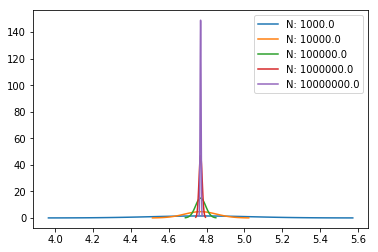

In [20]:
N = 100000
epsilons = np.random.randn(N)
S_0 = 100
r= 0.06
sigma = 0.2
k = 99
T = 1

Ns = np.logspace(3, 7, 5, endpoint=True)
for N in Ns:
    P_est, S_E, higer_confidence_intrval_95, lower_confidence_intrval_95 = monte_carlo(K, sigma)
    x = np.linspace(P_est - 3*S_E, P_est + 3*S_E, 100)
    plt.plot(x,norm.pdf(x, P_est, S_E), label='N: '+str(N))
    
    print("Put MC: " + str(P_est))
    print("SE: "+str(S_E))
    
plt.legend()    
plt.show()

Put MC: 2.088681186141843
SE: 0.01690732195551307
Put MC: 2.6181371437060474
SE: 0.01919660824963852
Put MC: 3.2306851884304963
SE: 0.021582144303964487
Put MC: 3.9297780093728583
SE: 0.024040901312857157
Put MC: 4.718416111938125
SE: 0.02654762132901161
Put MC: 5.598716370444694
SE: 0.029076845643719647
Put MC: 6.569399500633553
SE: 0.0316079116512774
Put MC: 7.629052176914128
SE: 0.03411895661635136
Put MC: 8.776513576156932
SE: 0.036587218691366864
Put MC: 10.009155034209673
SE: 0.03899344341190903


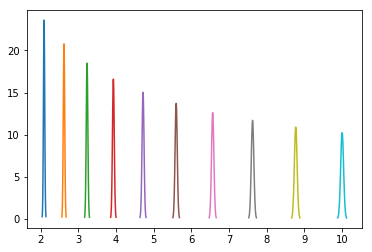

In [21]:
N = 100000
epsilons = np.random.randn(N)
S_0 = 100
r= 0.06
sigma = 0.2
K = 99
T = 1

Ks = np.linspace(90 , 110, 10)
for K in Ks:
    P_est, S_E, higer_confidence_intrval_95, lower_confidence_intrval_95 = monte_carlo(K, sigma)
    x = np.linspace(P_est - 3*S_E, P_est + 3*S_E, 100)
    plt.plot(x,norm.pdf(x, P_est, S_E))
    
    print("Put MC: " + str(P_est))
    print("SE: "+str(S_E))
    
plt.show()


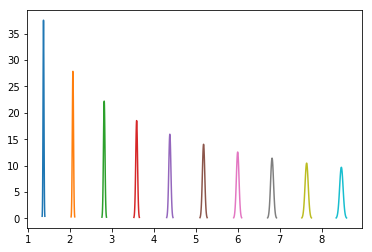

In [22]:
N = 100000
epsilons = np.random.randn(N)
S_0 = 100
r= 0.06
sigma = 0.2
K = 99
T = 1

sigmas = np.linspace(0.10 , 0.30, 10)
for sigma in sigmas:
    P_est, S_E, higer_confidence_intrval_95, lower_confidence_intrval_95 = monte_carlo(K, sigma)
    x = np.linspace(P_est - 3*S_E, P_est + 3*S_E, 100)
    plt.plot(x,norm.pdf(x, P_est, S_E))
plt.show()

# 2


In [23]:
def BS_delta():
    t = 0
    d1 = (np.log(S_0/K) + (r + 0.5*sigma**2) * (T - t)) / (sigma*np.sqrt(T - t))
    BS_delta = norm.cdf(d1)-1
    return BS_delta

def BS_C():
    d1 = (np.log(S_0/K)+(r+sigma**2/2) * T) / sigma*np.sqrt(T)
    d2 = d1 - sigma*T
    c = norm.cdf(d1)*S_0-norm.cdf(d2)*K*np.exp(-1*r*T)
    return c

def BS_P():
    d1 = (np.log(S_0/K)+(r+sigma**2/2) * T) / sigma*np.sqrt(T)
    d2 = d1 - sigma*T
    p = norm.cdf(-d2)*K*np.exp(-r*T) - norm.cdf(-d1)*S_0
    return p

# Same Seed

BS Delta: -0.3262644882651039
BS Put: 4.778969051891714

SE: 0.2744323214109817
MC delta: -0.32691904107853276
MC Put: 4.788440799746421
relative error: -0.0020062030560218445

SE: 0.08327622601750292
MC delta: -0.32553550619649485
MC Put: 4.682741152607305
relative error: -0.0022343285733773233

SE: 0.026806187047436886
MC delta: -0.32539522457319947
MC Put: 4.768313300406962
relative error: -0.00266429146649303

SE: 0.008458220722668717
MC delta: -0.3255058457277471
MC Put: 4.764373618583276
relative error: -0.0023252378504042773



KeyboardInterrupt: 

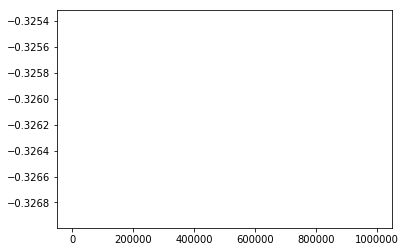

In [24]:
N = 100000
epsilons = np.random.randn(N)
S_0 = 100
r= 0.06
sigma = 0.2
K = 99
T = 1

def monte_carlo_bump(k, sigma, e):
    Ps = []
    Ps_bump = []
    Zs = np.random.randn(int(N))

    for Z in Zs:
        
        S_T = S_0*np.exp((r - 0.5*(sigma**2))*T+sigma*np.sqrt(T)*Z)
        S_T_bump = (S_0+e)*np.exp((r - 0.5*(sigma**2))*T+sigma*np.sqrt(T)*Z)
        
        P = max((k - S_T), 0)
        P_bump =  max((k - S_T_bump), 0)
        
        Ps_bump.append(P_bump)
        Ps.append(P)
    
    P_est = np.exp(-r*T)*np.mean(Ps)
    SE_est = np.std(Ps)/np.sqrt(N)

    P_bump_est = np.exp(-r*T)*np.mean(Ps_bump)
    SE_bump_est = np.std(Ps_bump)/np.sqrt(N)
    
    delta = (P_bump_est - P_est)/e
    
    
    print("SE: "+str(SE_est))
    print("MC delta: "+str(delta))
    return delta, P_est

BS_d = BS_delta()
print("BS Delta: " + str(BS_d))
print("BS Put: " + str(BS_P()))
print()

Ns = np.logspace(3, 7, 5, endpoint=True)
e = 0.01
for N in Ns:
    MC_delta, MC_P = monte_carlo_bump(K, sigma, e)
    relative_error = np.abs(MC_delta - BS_d)/BS_d
    
    print("MC Put: "+str(MC_P))
    print("relative error: "+str(relative_error))
    print()
    plt.plot(N,MC_delta)

# Different Seed

In [35]:
N = 100000
epsilons = np.random.randn(N)
S_0 = 100
r= 0.06
sigma = 0.2
K = 99
T = 1

def monte_carlo_bump_ds(k, sigma, e):
    Ps = []
    Ps_bump = []
    Zs = np.random.randn(int(N))
    Zs2 = np.random.randn(int(N))

    for Z1,Z2 in zip(Zs,Zs2):
        
        S_T = S_0*np.exp((r - 0.5*(sigma**2))*T+sigma*np.sqrt(T)*Z1)
        S_T_bump = (S_0+e)*np.exp((r - 0.5*(sigma**2))*T+sigma*np.sqrt(T)*Z2)
        
        P = max((k - S_T), 0)
        P_bump =  max((k - S_T_bump), 0)
        
        Ps_bump.append(P_bump)
        Ps.append(P)
    
    P_est = np.exp(-r*T)*np.mean(Ps)
    SE_est = np.std(Ps)/np.sqrt(N)

    P_bump_est = np.exp(-r*T)*np.mean(Ps_bump)
    SE_bump_est = np.std(Ps_bump)/np.sqrt(N)
    
    delta = (P_bump_est - P_est)/e
    
    
    print("SE: "+str(SE_est))
    print("MC delta: "+str(delta))
    return delta, P_est

BS_delta = BS_delta()
print("BS Delta: " + str(BS_delta))
print("BS Put: " + str(BS_P()))
print()

Ns = np.logspace(3, 7, 5, endpoint=True)
e = 0.01
for N in Ns:
    MC_delta, MC_P = monte_carlo_bump_ds(K, sigma, e, Zs)
    relative_error = np.abs(MC_delta - BS_delta)/BS_delta
    
    print("MC Put: "+str(MC_P))
    print("relative error: "+str(relative_error))
    print()

SE: 0.27685145934994076
MC delta: -11.023946627904202
MC Put: 5.109213025269233

SE: 0.08475424130670842
MC delta: -6.083639133225116
MC Put: 4.791951113992124

SE: 0.0267298606628267
MC delta: 3.220039348990067
MC Put: 4.773523364845292

SE: 0.008465358785562255
MC delta: 0.6996012321173417
MC Put: 4.773588713661874

SE: 0.0026792210588083257
MC delta: -0.402213347381597
MC Put: 4.782685606759871



# 2.2 bump and revalue



In [16]:
N = 100000
epsilons = np.random.randn(N)
S_0 = 100
r= 0.06
sigma = 0.2
K = 99
T = 1

def monte_carlo_bump_digital(k, sigma, e):
    Ps = []
    Ps_bump = []
    Zs = np.random.randn(int(N))
    Zs2 = np.random.randn(int(N))

    for Z1,Z2 in zip(Zs,Zs2):
        
        S_T = S_0*np.exp((r - 0.5*(sigma**2))*T+sigma*np.sqrt(T)*Z1)
        S_T_bump = (S_0+e)*np.exp((r - 0.5*(sigma**2))*T+sigma*np.sqrt(T)*Z2)
        
        
        if k < S_T:
            P = 1
        else:
            P = 0
        if k < S_T_bump:
            P_bump = 1
        else:
            P_bump = 0
            

        
        Ps_bump.append(P_bump)
        Ps.append(P)
    
    P_est = np.exp(-r*T)*np.mean(Ps)
    SE_est = np.std(Ps)/np.sqrt(N)

    P_bump_est = np.exp(-r*T)*np.mean(Ps_bump)
    SE_bump_est = np.std(Ps_bump)/np.sqrt(N)
    
    delta = (P_bump_est - P_est)/e
    
    return delta



Ns = np.logspace(3, 7, 5, endpoint=True)
e = 0.01
for N in Ns:
    MC_delta, MC_P = monte_carlo_bump_digital(K, sigma, e)

    
    print("MC Put: "+str(MC_P))

    print()

SE: 0.015416841440450762
MC delta: 2.636940694035894
MC Put: 0.575418130019976

SE: 0.004908338924727997
MC delta: -0.01883529067169265
MC Put: 0.5606324268427033

SE: 0.0015488502803692808
MC delta: -0.14032291550405418
MC Put: 0.5655578553533489

SE: 0.0004901699695370984
MC delta: 0.04303863918480033
MC Put: 0.5637948721464792



KeyboardInterrupt: 

In [45]:
results['MC_bump'] = {}
Ns = np.logspace(4, 7, 6, endpoint=True)
bumps = [0.01, 0.05 ,0.1]

BS_d = ( np.exp(-r*T)*norm.pdf(d2))/(S_0*sigma*np.sqrt(T))
N = 100000
S_0 = 100
r= 0.06
sigma = 0.2
K = 99
T = 1

repetitions = 20

results['MC_bump']['N'] = []
results['MC_bump']['delta'] = []
results['MC_bump']['RE'] = []
for i in range(repetitions):
    results['MC_bump']['N'].append([])
    results['MC_bump']['delta'].append([])
    results['MC_bump']['RE'].append([])
    for N in Ns:    
        MC_delta = monte_carlo_bump_digital(K, sigma, e)
        relative_error = np.abs(MC_delta - BS_d)/BS_d

        results['MC_bump']['N'][i].append(N)
        results['MC_bump']['delta'][i].append(MC_delta)
        results['MC_bump']['RE'][i].append(relative_error)

SE: 0.004903618153975694
MC delta: -0.0018835290671681548
SE: 0.0024566838788359587
MC delta: 0.12727187115506577
SE: 0.0012318242834408488
MC delta: 0.05288508570878703
SE: 0.0006169728880276159
MC delta: 0.007701800587514018
SE: 0.0003092262192926907
MC delta: 0.008285804448215917
SE: 0.00015499523864872763
MC delta: 0.016396120529702518


In [46]:
N = 100000
epsilons = np.random.randn(N)
S_0 = 100
r= 0.06
sigma = 0.2
K = 99
T = 1

def monte_carlo_bump_smooth_digital(k, sigma, e):
    Ps = []
    Ps_bump = []
    Zs = np.random.randn(int(N))
    Zs2 = np.random.randn(int(N))

    for Z1,Z2 in zip(Zs,Zs2):
        
        S_T = S_0*np.exp((r - 0.5*(sigma**2))*T+sigma*np.sqrt(T)*Z1)
        S_T_bump = (S_0+e)*np.exp((r - 0.5*(sigma**2))*T+sigma*np.sqrt(T)*Z2)
        
        
        P = norm.cdf(S_T, K, 0.0001)
        P_bump = norm.cdf(S_T_bump, K, 0.0001)

        
        Ps_bump.append(P_bump)
        Ps.append(P)
    
    P_est = (np.exp(-r*T)*np.mean(Ps))
    P_bump_est = (np.exp(-r*T)* np.mean(Ps_bump))
    print(P_bump_est , P_est)
    delta = (P_bump_est - P_est)/e
    

    print("MC delta: "+str(delta))
    return delta



Ns = np.logspace(3, 7, 5, endpoint=True)
e = 0.01
for N in Ns:
    MC_delta = monte_carlo_bump_smooth_digital(K, sigma, e)
    
    print("MC Put: "+str(MC_P))

0.5876610689565712 0.5688257782848862
MC delta: 1.883529067168499
MC Put: 0.9417645335842487
0.5600673681225528 0.561668367829646
MC delta: -0.16009997070932647
MC Put: 0.9417645335842487
0.5658215476300883 0.5640451200172704
MC delta: 0.17764276128179324
MC Put: 0.9417645335842487


KeyboardInterrupt: 

In [47]:
results['MC_bump_smooth'] = {}
Ns = np.logspace(4, 7, 6, endpoint=True)
bumps = [0.01, 0.05 ,0.1]

BS_d = ( np.exp(-r*T)*norm.pdf(d2))/(S_0*sigma*np.sqrt(T))
N = 100000
S_0 = 100
r= 0.06
sigma = 0.2
K = 99
T = 1

repetitions = 20

results['MC_bump_smooth']['N'] = []
results['MC_bump_smooth']['delta'] = []
results['MC_bump_smooth']['RE'] = []
for i in range(repetitions):
    results['MC_bump_smooth']['N'].append([])
    results['MC_bump_smooth']['delta'].append([])
    results['MC_bump_smooth']['RE'].append([])
    for N in Ns:    
        MC_delta = monte_carlo_bump_smooth_digital(K, sigma, e)
        relative_error = np.abs(MC_delta - BS_d)/BS_d

        results['MC_bump_smooth']['N'][i].append(N)
        results['MC_bump_smooth']['delta'][i].append(MC_delta)
        results['MC_bump_smooth']['RE'][i].append(relative_error)

0.5623276030031549 0.5602557210395637
MC delta: 0.20718819635912045
0.5638758960691824 0.5615812173513561
MC delta: 0.22946787178262928
0.5636506016321273 0.5641353118178255
MC delta: -0.048471018569817836
0.5643666622973376 0.5641058522361635
MC delta: 0.026081006117406602
0.5642778766776819 0.5640236886399764
MC delta: 0.025418803770549392


KeyboardInterrupt: 

In [ ]:
for i in results:
     print("{}\t{}".format(i,dic[i]))

# 2.2 bump and revalue smooth
`



# likelyhood


In [20]:

import numpy as np
N = 100000
epsilons = np.random.randn(N)
S_0 = 100
r= 0.06
sigma = 0.2
K = 99
T = 1

def Z(x):
    return (np.log(x/S_0)-((r-(sigma**2))/2)*T)/sigma*np.sqrt(T)


def monte_carlo_likely_digital(k, sigma, e):
    Ps = []
    Ps_bump = []
    Zs = np.random.randn(int(N))

    delta_list = []
    P_list = []
    for Z1 in Zs:
        
        S_T = S_0*np.exp((r - 0.5*(sigma**2))*T+sigma*np.sqrt(T)*Z1)
        
        if k > S_T:
            P = 0
        else:
            P = 1

        P_est = np.exp(-r*T)*P

        delta = P_est * (Z1 / (S_0*(sigma)*np.sqrt(T)) )
        
        
        delta_list.append(delta)

    
    delta  = np.mean(delta_list)


    return delta


Ns = np.logspace(3, 7, 5, endpoint=True)
e = 0.01
for N in Ns:
    MC_delta = monte_carlo_likely_digital(K, sigma, e)


MC delta: 0.017146754124986324
MC delta: 0.017758234150291197
MC delta: 0.01807393995840338
MC delta: 0.018193274996620924
MC delta: 0.0181907515497001


In [ ]:
results['likely'] = {}
Ns = np.logspace(4, 7, 3, endpoint=True)

BS_d = ( np.exp(-r*T)*norm.pdf(d2))/(S_0*sigma*np.sqrt(T))
N = 100000
S_0 = 100
r= 0.06
sigma = 0.2
K = 99
T = 1

repetitions = 20

results['likely']['N'] = []
results['likely']['delta'] = []
results['likely']['RE'] = []

for i in range(repetitions):
    results['likely']['N'].append([])
    results['likely']['delta'].append([])
    results['likely']['RE'].append([])
    for N in Ns:    

        MC_delta = monte_carlo_likely_digital(K, sigma, e)
        relative_error = np.abs(MC_delta - BS_d)/BS_d

        results['likely']['N'][i].append(N)
        results['likely']['delta'][i].append(MC_delta)
        results['likely']['RE'][i].append(relative_error)

MC delta: 0.018295255784367016
MC delta: 0.018102245439561758
MC delta: 0.018210533828096776
MC delta: 0.01823366781541211
MC delta: 0.018167580087481313
MC delta: 0.018213682448656218
MC delta: 0.0182492164172728
MC delta: 0.018189155272229737
MC delta: 0.018219163801885777
MC delta: 0.018510200505185617
MC delta: 0.01815483031741587
MC delta: 0.0182159089948442
MC delta: 0.018007460540199083
MC delta: 0.018210709958632075
MC delta: 0.01820057312130014
MC delta: 0.01803469578864412
MC delta: 0.01825818198909905
MC delta: 0.01821272947853549
MC delta: 0.018326580693711382
MC delta: 0.01820943685455793
MC delta: 0.01820553065865271
MC delta: 0.01839079640070962
MC delta: 0.018182017965541867
MC delta: 0.018203926864010674
MC delta: 0.018109151154796527
MC delta: 0.018255678424387835
MC delta: 0.018212312478017037
MC delta: 0.01848621795068942
MC delta: 0.01817264839254908
MC delta: 0.018219098679040403
MC delta: 0.018478497027020625
MC delta: 0.018195783262740597
MC delta: 0.01818903421

0.25025167926750747
2.2155451905753653e-281 90
1.9533853112328884e-222 91
2.001488903466668e-170 92
2.383287415554312e-125 93
3.2980528978696276e-87 94
5.3039177231360715e-56 95
9.912744307785212e-32 96
2.153024608252453e-14 97
0.0005434530712763886 98
1.594164249243586 99
0.0005434530712763886 100
2.153024608252453e-14 101
9.912744307785212e-32 102
5.3039177231360715e-56 103
3.2980528978696276e-87 104
2.383287415554312e-125 105
2.001488903466668e-170 106
1.9533853112328884e-222 107
2.2155451905753653e-281 108
0.0 109


<function matplotlib.pyplot.show>

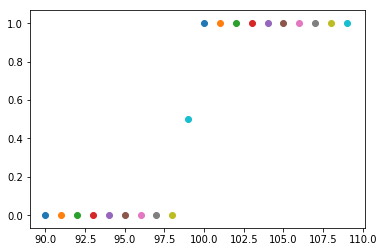

In [10]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

N = 100000
epsilons = np.random.randn(N)
S_0 = 100
r= 0.06
sigma = 0.2
K = 99
T = 1

d1 = (np.log(S_0/K)+(r+sigma**2/2) * T) / sigma*np.sqrt(T)
d2 = d1 - sigma*np.sqrt(T)
print(d2)

for i in range (20):
    i = i+90
    print(norm.pdf(i, K, d2 ), i)
    plt.scatter(i, norm.cdf(i, K, d2 ))
    
plt.show
    
    


In [30]:
( np.exp(-r*T)*norm.pdf(d2))/(S_0*sigma*np.sqrt(T))

0.018206369779490493

In [39]:
N = 100000
epsilons = np.random.randn(N)
S_0 = 100
r= 0.06
sigma = 0.2
K = 99
T = 1

def monte_carlo_path_digital(k, sigma):
    Ps = []
    Ps_bump = []
    Zs = np.random.randn(int(N))
    Zs2 = np.random.randn(int(N))

    delta_list = []
    for Z1,Z2 in zip(Zs,Zs2):
        
        S_T = S_0*np.exp((r - 0.5*(sigma**2))*T+sigma*np.sqrt(T)*Z1)
        
        if k < S_T:
            P = 1
        else:
            P = 0





        delta = np.exp(-r*T)*norm.pdf(S_T, K, d2 )*(S_T/S_0)
        delta_list.append(delta)
        
    delta  = np.mean(delta_list)
    
    return delta

# # BS_delta = BS_delta()
# print("BS Delta: " + str(BS_delta))
# print("BS Put: " + str(BS_P()))
# print()

Ns = np.logspace(3, 7, 5, endpoint=True)
for N in Ns:
    MC_delta= monte_carlo_path_digital(K, sigma)
#     relative_error = np.abs(MC_delta - BS_delta)/BS_delta
    

    print("MC_delta", MC_delta)
N = 100000
epsilons = np.random.randn(N)
S_0 = 100
r= 0.06
sigma = 0.2
K = 99
T = 1#     print()

MC_delta 0.019165422691613573
MC_delta 0.01969935552785869


KeyboardInterrupt: 

In [40]:
results['path'] = {}
Ns = np.logspace(4, 7, 6, endpoint=True)
bumps = [0.01, 0.05 ,0.1]

BS_d = ( np.exp(-r*T)*norm.pdf(d2))/(S_0*sigma*np.sqrt(T))
N = 100000
S_0 = 100
r= 0.06
sigma = 0.2
K = 99
T = 1

repetitions = 1

results['path']['N'] = []
results['path']['delta'] = []
results['path']['RE'] = []

for i in range(repetitions):
    results['path']['N'].append([])
    results['path']['delta'].append([])
    results['path']['RE'].append([])
    for N in Ns:    

        MC_delta = monte_carlo_likely_digital(K, sigma, e)
        relative_error = np.abs(MC_delta - BS_d)/BS_d

        results['path']['N'][i].append(N)
        results['path']['delta'][i].append(MC_delta)
        results['path']['RE'][i].append(relative_error)

MC delta: 0.017990703620684556
MC delta: 0.01841082969210183
MC delta: 0.018153027858474304
MC delta: 0.018203290076016686
MC delta: 0.018211411108246423
MC delta: 0.018203365948887225


In [37]:
results['likely'] = {}
Ns = np.logspace(4, 7, 8, endpoint=True)
bumps = [0.01, 0.05 ,0.1]

BS_d = ( np.exp(-r*T)*norm.pdf(d2))/(S_0*sigma*np.sqrt(T))
N = 100000
S_0 = 100
r= 0.06
sigma = 0.2
K = 99
T = 1

repetitions = 20

results['likely']['N'] = []
results['likely']['delta'] = []
results['likely']['RE'] = []

for i in range(repetitions):
    results['likely']['N'].append([])
    results['likely']['delta'].append([])
    results['likely']['RE'].append([])
    for N in Ns:    

        MC_delta = monte_carlo_path_digital(K, sigma, e)
        relative_error = np.abs(MC_delta - BS_d)/BS_d

        results['likely']['N'][i].append(N)
        results['likely']['delta'][i].append(MC_delta)
        results['likely']['RE'][i].append(relative_error)

NameError: name 'monte_carlo_path_digital' is not defined

In [31]:
wide = []
small = []
for i in range(1000000):

    wide.append(np.random.normal(3, 30))
    small.append(np.random.normal(3, 5))
    
print(np.mean(wide))
np.mean(small)


2.989792455363362


2.996933809539762

In [ ]:
kfkf